In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Lettura dei dati e creazione dei dataframe per i giocatori, i tornei e i match ATP dal 1968 al 2024 
atp_matches = pd.read_csv('Data/atpdata/atp_matches.csv')
atp_players = pd.read_csv('Data/atpdata/atp_players.csv')
atp_rankings = pd.read_csv('Data/atpdata/atp_rankings.csv', low_memory=False);

atp_matches['tourney_date'] = pd.to_datetime(atp_matches.tourney_date, format='%Y%m%d')

#Pallet di colori per i grafici
colors = ['#11565c', '#007660', '#459146', '#9aa414', '#ffa600' ]

djokovic = atp_matches[(atp_matches['winner_name'] == 'Novak Djokovic') | (atp_matches['loser_name'] == 'Novak Djokovic')]
nadal = atp_matches[(atp_matches['winner_name'] == 'Rafael Nadal') | (atp_matches['loser_name'] == 'Rafael Nadal')]
federer = atp_matches[(atp_matches['winner_name'] == 'Roger Federer') | (atp_matches['loser_name'] == 'Roger Federer')]


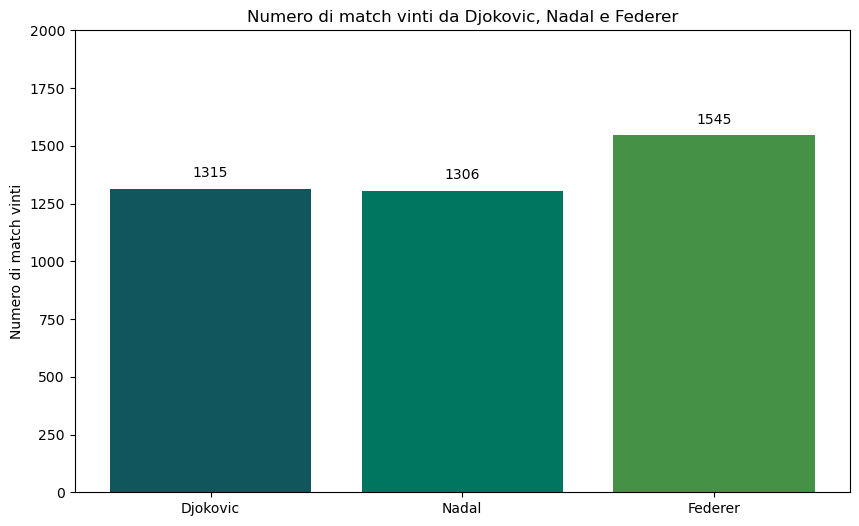

In [4]:
#Match vinti da Djokovic, Nadal e Federer

plt.figure(figsize=(10, 6)) 
plt.bar(['Djokovic', 'Nadal', 'Federer'], [djokovic.shape[0], nadal.shape[0], federer.shape[0]], color=colors)
plt.ylabel('Numero di match vinti')
plt.title('Numero di match vinti da Djokovic, Nadal e Federer')

plt.ylim(0, 2000)

for i, v in enumerate([djokovic.shape[0], nadal.shape[0], federer.shape[0]]):
    plt.text(i, v + 50, str(v), color='black', ha='center')

    
plt.show()



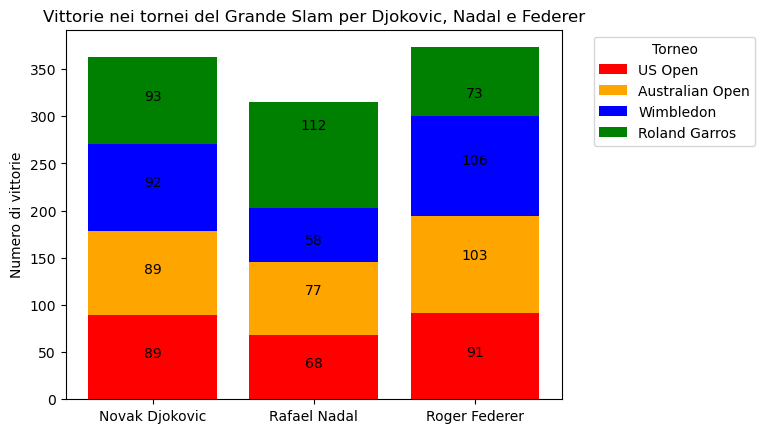

In [18]:
# Numero di slam vinti da Djokovic, Nadal e Federer

total_grand_slam_wins = atp_matches[(atp_matches['winner_name'].isin(['Novak Djokovic', 'Rafael Nadal', 'Roger Federer'])) & atp_matches['tourney_level'].isin(['G'])]
slams_by_tourney = total_grand_slam_wins.groupby(['winner_name', 'tourney_name']).size().reset_index(name='count')

players = ['Novak Djokovic', 'Rafael Nadal', 'Roger Federer']
us_open_wins = [slams_by_tourney[(slams_by_tourney['winner_name'] == player) & (slams_by_tourney['tourney_name'] == 'US Open')]['count'].values[0] for player in players]
aus_open_wins = [slams_by_tourney[(slams_by_tourney['winner_name'] == player) & (slams_by_tourney['tourney_name'] == 'Australian Open')]['count'].values[0] for player in players]
wimbledon_wins = [slams_by_tourney[(slams_by_tourney['winner_name'] == player) & (slams_by_tourney['tourney_name'] == 'Wimbledon')]['count'].values[0] for player in players]
roland_garros_wins = [slams_by_tourney[(slams_by_tourney['winner_name'] == player) & (slams_by_tourney['tourney_name'] == 'Roland Garros')]['count'].values[0] for player in players]

colors = {'Wimbledon': 'blue', 'US Open': 'red', 'Roland Garros': 'green', 'Australian Open': 'orange'}
plt.bar(players, us_open_wins, label='US Open', color=colors['US Open'])
plt.bar(players, aus_open_wins, label='Australian Open',bottom=us_open_wins, color=colors['Australian Open'])
plt.bar(players, wimbledon_wins, label='Wimbledon', bottom=[i+j for i,j in zip(us_open_wins, aus_open_wins)], color=colors['Wimbledon'])
plt.bar(players, roland_garros_wins, label='Roland Garros', bottom=[i+j+k for i,j,k in zip(us_open_wins, aus_open_wins, wimbledon_wins)], color=colors['Roland Garros'])

for i, v in enumerate(us_open_wins):
    plt.text(i, v/2, str(v), color='black', ha='center')

for i, v in enumerate(aus_open_wins):
    plt.text(i, v + us_open_wins[i]/2, str(v), color='black', ha='center')

for i, v in enumerate(wimbledon_wins):
    plt.text(i, v + us_open_wins[i] + aus_open_wins[i]/2, str(v), color='black', ha='center')

for i, v in enumerate(roland_garros_wins):
    plt.text(i, v + us_open_wins[i] + aus_open_wins[i] + wimbledon_wins[i]/2, str(v), color='black', ha='center')


plt.legend(title='Torneo', loc='best', bbox_to_anchor=(1.05, 1))
plt.ylabel('Numero di vittorie')
plt.title('Vittorie nei tornei del Grande Slam per Djokovic, Nadal e Federer')
plt.show()

